## Семинар 14
# Тема: Методы уменьшения размерности

Уменьшение размерности в машинном обучении - это уменьшение числа признаков в наборе данных. Это задача обучения без учителя.

Причины необходимости уменьшения количества признаков:

1. Улучшение обобщающей способности модели из-за удаления избыточных (зависящих от остальных признаков) и неважных (не связаных с зависимой переменной) признаков
2. Сокращение времени обучения
3. Простые модели легче интерпретировать

Задача-минимум – сократить признаковое пространство без потери качества. 
Задача-максимум – сократить признаковое пространство и при этом улучшить качество модели на тестовом наборе.

Не существует одного оптимального метода отбора признаков.

## Подходы к уменьшеню размерности 
Делятся на два основных:

**Отбор признаков** (feature selection)

**Выделение признаков** (feature extraction)

## Отбор признаков
Отбор признаков – это выбор подмножества признаков из имеющихся. 

Существует три типа методов отбора признаков:

1. методы-фильтры (filter methods)
2. методы-обертки (wrapper methods)
3. встроенные методы (embedded methods)

Их можно комбинировать.

**Методы-фильтры** основываются только на статистиках признаков и не используют методы машинного обучения.
В их основе – следующая процедура: получение оценки каждого признака, затем ранжирование признаков по полученным оценкам и выбор признаков с наиболее высокой оценкой.

Примерами методов-фильтров может быть отбор признаков по:

1. Дисперсии (низкая оценка дисперсии может указывать на почти константный признак)
2. Критерию хи-квадрат или F-критерию (чем выше значение хи-квадрат/ F-критерий и ниже p-значение, тем переменная важнее)
3. Коэффициенту корреляции (есть корреляция с зависимой переменной – хороший признак, есть корреляция с другим признаком – избыточный признак)
4. Метрике (чем выше метрика, тем важнее признак).

И др.

**Методы-обертки** используют методы машинного обучения. В их основе – следующая процедура: находим подмножество признаков, строим модель машинного обучения и оцениваем качество, а потом повторяем с другим количеством признаков.

Примеры методов-оберток:

1. Метод прямого включения  (добавляет по одному признаку за итерацию)
2. Метод обратного исключения (исключает по одному признаку за итерацию)
3. Метод исчерпывающего поиска (перебирает все возможные комбинации признаков)

**Встроенные методы** выполняют отбор признаков в ходе обучения модели машинного обучения. В их основе – следующая процедура: обучаем модель машинного обучения, вычисляем важности признаков и удаляем неважные признаки.

Примерами встроенных методов является отбор признаков с помощью регуляризации LASSO, отбор признаков на основе
важностей на основе уменьшения неоднородности для случайного леса.

Отбор признаков – это тоже модель, либо использующая вычисление статистик признаков (в случае с методами-фильтрами), либо использующая параметры моделей машинного обучения (в случае с методами-обертками и встро-
енными методами).

## Выделение признаков

Выделение признаков – это составление меньшего количества новых признаков из исходных, максимально полно описывающих пространство исходного набора данных.

**Метод главных компонент** (англ. Principal Components Analysis, PCA) — один из основных способов уменьшить 
размерность данных, потеряв наименьшее количество информации. Изобретен К.Пирсоном в 1901 г. 
Вычисление главных компонент осуществляется так:
1. Вычисляется матрица ковариации признаков.
2. Отыскиваются собственные вектора и собственные числа матрицы ковариации.
3. Упорядочиваются собственные числа по убыванию. Чем больше число - тем больше дисперсия.
4. Берутся N первых собственных векторов, которые соответствуют первым N собственным числам. 
Они и будут искомыми главными компонентами.

Прежде чем понижать размерность, необходимо масштабировать исходный набор данных.

Импортируем необходимые библиотеки

In [65]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

## Отбор признаков (методы-фильтры)

### 1. Загрузите прилагающийся датасет diabetes.csv. Выведите первые пять строк. Отделите целевую переменную Outcome и обозначьте её за y, а оставшиеся данные за X. Выведите их размеры.

In [66]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X.shape, y.shape

((768, 8), (768,))

### 2. Сделайте 10-блочную перекрёстную проверку модели логистической регрессии LogisticRegression(max_iter = 1200), используя библиотечную функцию cross_val_score и выведите средние значение метрики f1-score.

In [68]:
model = LogisticRegression(max_iter=1200)

In [69]:
cross_vs = cross_val_score(model, X, y, cv=10, scoring='f1', n_jobs=-1)
score__ = cross_vs.mean()
score__

0.6377596026885664

### 3. Осуществите отбор признаков, используя класс VarianceThreshold(threshold=0.5). Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [70]:
selector = VarianceThreshold(threshold=0.5)
selector.fit(X)

VarianceThreshold(threshold=0.5)

In [71]:
selector.variances_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [72]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

In [73]:
for i, j in zip(X.columns, selector.get_support()):
    print(i, j)

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction False
Age True


In [74]:
true_cols = X.columns[selector.get_support()]
true_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'],
      dtype='object')

In [75]:
X_selector = selector.transform(X)
X_selector

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [76]:
score_new = cross_val_score(model, X_selector, y, cv=10, n_jobs=-1)
score_new = score_new.mean()
score_new - score__

0.13180635766686777

In [77]:
pd.DataFrame(X_selector, columns = true_cols).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0


### 4. Осуществите отбор признаков, используя класс SelectKBest(score_func=chi2, k=7). Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [78]:
selector_chi2 = SelectKBest(score_func=chi2, k=7)
selector_chi2.fit(X, y)
selector_chi2.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [79]:
pd.Series(selector_chi2.scores_, X.columns)

Pregnancies                  111.519691
Glucose                     1411.887041
BloodPressure                 17.605373
SkinThickness                 53.108040
Insulin                     2175.565273
BMI                          127.669343
DiabetesPedigreeFunction       5.392682
Age                          181.303689
dtype: float64

In [80]:
X_selector_chi2 = selector_chi2.transform(X)
X_selector_chi2[5:]

array([[  5. , 116. ,  74. , ...,   0. ,  25.6,  30. ],
       [  3. ,  78. ,  50. , ...,  88. ,  31. ,  26. ],
       [ 10. , 115. ,   0. , ...,   0. ,  35.3,  29. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [81]:
selector_chi2.get_feature_names_out()

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'Age'], dtype=object)

In [82]:
pd.DataFrame(X_selector_chi2, columns=selector_chi2.get_feature_names_out()).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0


In [83]:
cross_val_score(model, X_selector_chi2, y, cv=10, scoring='f1').mean()

0.6303290985487632

### 5. Повторите тот же самый отбор и обучение модели с 10-блочной перекрёстной проверкой, что и в пункте 4, но используйте теперь Pipeline. Убедитесь, что значение метрики f1 будет то же.

In [84]:
pipe = Pipeline([
    ('feature_selection', SelectKBest(score_func=chi2, k=7)),
    ('mosel', LogisticRegression(max_iter = 1200))
])

In [85]:
cross_val_score(pipe, X, y,  cv=10, scoring='f1').mean()

0.6303290985487632

### 6. Осуществите отбор признаков по метрике roc_auc. Отбросьте признаки со значением этой метрики меньшей, либо равной 0.55. Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [86]:
metric_list = []
for i in X.columns:
    metric = cross_val_score(model, X[[i]], y, cv=10, scoring='roc_auc').mean()
    metric_list.append(metric)
metric_list

[0.6224501424501424,
 0.7888019943019944,
 0.5873817663817663,
 0.5532207977207977,
 0.5383760683760684,
 0.6901880341880341,
 0.6056709401709401,
 0.6873746438746438]

In [87]:
metric_values = pd.Series(metric_list, X.columns).sort_values()
metric_values

Insulin                     0.538376
SkinThickness               0.553221
BloodPressure               0.587382
DiabetesPedigreeFunction    0.605671
Pregnancies                 0.622450
Age                         0.687375
BMI                         0.690188
Glucose                     0.788802
dtype: float64

In [88]:
true_cols_metric = metric_values.index[metric_values > 0.55].tolist()
true_cols_metric

['SkinThickness',
 'BloodPressure',
 'DiabetesPedigreeFunction',
 'Pregnancies',
 'Age',
 'BMI',
 'Glucose']

In [89]:
X[true_cols_metric].head(3)

,SkinThickness,BloodPressure,DiabetesPedigreeFunction,Pregnancies,Age,BMI,Glucose
0,35,72,0.627,6,50,33.6,148
1,29,66,0.351,1,31,26.6,85
2,0,64,0.672,8,32,23.3,183


In [90]:
cross_val_score (model, X[true_cols_metric], y, cv=10, scoring ='f1').mean()

0.6290289560743691

In [92]:
X.drop(true_cols_metric, axis=1).head()

,Insulin
0,0
1,0
2,0
3,94
4,168


### 7. Осуществите отбор признаков, используя матрицу корреляции. Отбросьте признаки с корреляцией большей 0.5.  Сделайте 7-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

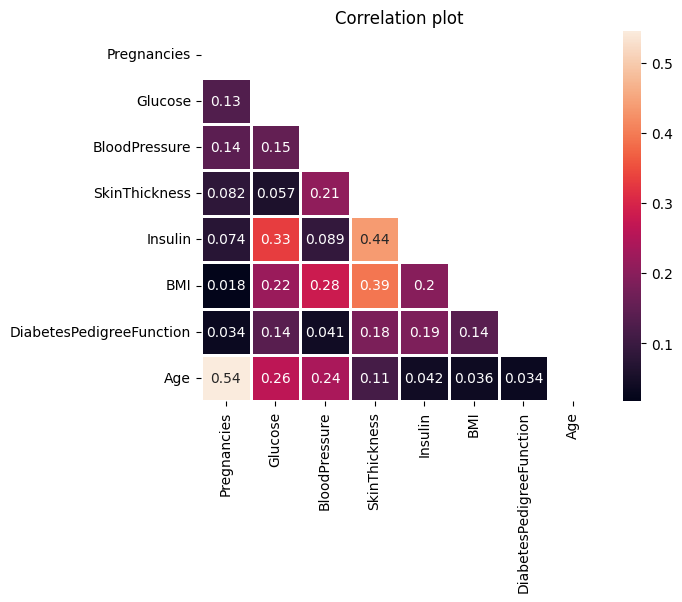

In [93]:
corr = X.corr().abs()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.title('Correlation plot')
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g',linewidths=2);

upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column]>0.5)]

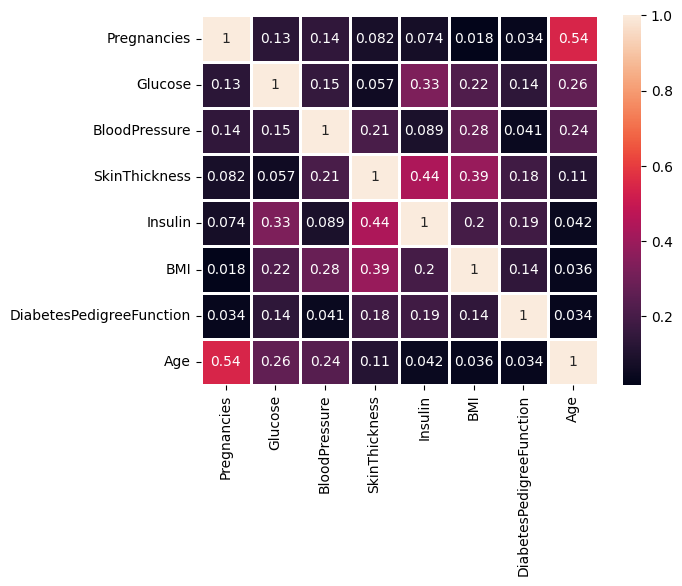

In [94]:
corr = X.corr().abs()
sns.heatmap(corr, annot=True, fmt='.2g', linewidths=2)
plt.show()

In [95]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool_))
upper

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
Glucose,NaN,NaN,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,NaN,NaN,NaN,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,NaN,NaN,NaN,NaN,0.436783,0.392573,0.183928,0.113970
Insulin,NaN,NaN,NaN,NaN,NaN,0.197859,0.185071,0.042163
BMI,NaN,NaN,NaN,NaN,NaN,NaN,0.140647,0.036242
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033561
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
to_drop = [column for column in upper.columns if any(upper[column]>0.5)]
to_drop

['Age']

In [97]:
X_selector_corr = X.drop (to_drop, axis=1)
X_selector_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


In [98]:
cross_val_score (model, X_selector_corr, y, cv=10, scoring='f1').mean()

0.6214597989942018

###  Метод главных компонент

### 1. Загрузите встроенный датасет load_iris. Выведите информацию о его размерах. Выведите первые 5 строк в виде датафрейма. Обозначьте данные за X, а целевую переменную за y.  

In [111]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name = 'target')

In [112]:
X.shape

(150, 4)

In [113]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 2. Разделите данные на обучающую и тестовую выборки в соотношении 75-25. Зафиксируйте воспроизводимость разбиения random_state = 1234. Выведите размеры полученных выборок.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1234)

In [115]:
X_train.shape

(112, 4)

In [116]:
y_train.shape

(112,)

### 3. Произведите стандартную нормализацию данных.

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Реализуйте модель логистической регрессии и выведите отчёт о классификации на тестовых данных.

In [120]:
model = LogisticRegression()
model. fit(X_train_scaled, y_train)

LogisticRegression()

In [121]:
y_pred = model.predict(X_test_scaled)
metrics.classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        13\n           1       0.93      0.93      0.93        15\n           2       0.90      0.90      0.90        10\n\n    accuracy                           0.95        38\n   macro avg       0.94      0.94      0.94        38\nweighted avg       0.95      0.95      0.95        38\n'

### 5. Понизьте размерность данных с помощью метода главных компонент PCA(n_components=2) до двух.

In [122]:
pca2 = PCA(n_components=2)
X_train_scaled_transform2 = pca2.fit_transform(X_train_scaled)
X_train_scaled_transform2 = pca2.transform(X_train_scaled)

In [123]:
X_train_scaled_transform2[:5]

array([[-2.78916721,  0.31360103],
       [-0.39228556, -1.9589319 ],
       [-2.06162488,  0.57426338],
       [ 1.18819102, -1.49598984],
       [-2.62647303,  1.60022987]])

### 7. Визуализируйте полученные данные на диаграмме рассеяния, подкрасив классы. Сделайте вывод о том все ли классы являются линейно разделимыми.

### 8. Обучите заново модель логистической регрессии и оцените ее обучающую способность по отчёту о классификации. Сделайте вывод об эффективности редукции признаков в данном случае.  

# Задания для самостоятельного выполнения:

## Отбор признаков (методы-фильтры)

1. Загрузите прилагающийся датасет titanic.csv. Обозначьте данные за X, а целевую переменную Survived за y и выведите их размеры.
2. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии и выведите средние значение метрики accuracy.
3. Осуществите отбор признаков, используя класс VarianceThreshold(threshold=0.1). Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из предыдущего пункта и сделайте вывод о том эффективно ли был проведён отбор признаков.
4. Повторите тот же самый отбор и обучение модели с 3-блочной перекрёстной проверкой, что и в пункте 4, но используйте теперь Pipeline. Убедитесь, что значение метрики будет то же.
5. Осуществите отбор признаков, используя класс SelectKBest(score_func=chi2, k=9). Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из пункта 2 и сделайте вывод о том эффективно ли был проведён отбор признаков.
6. Осуществите отбор признаков по метрике roc_auc. Отбросьте признаки со значением этой метрики меньшей, либо равной 0.49. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. 
7. Осуществите отбор признаков, используя матрицу корреляции. Отбросьте признаки с корреляцией большей 0.5.  Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из пункта 3 и сделайте вывод о том эффективно ли был проведён отбор признаков.

## Метод главных компонент

1. Загрузите прилагающийся датасет heart.csv.
2. Обозначьте данные за X, а целевую переменную output за y и выведите их размеры.
3. Разделите данные на обучающую и тестовую выборки в соотношении 85-15. Зафиксируйте воспроизводимость разбиения random_state = 15. Выведите размеры полученных выборок.
4. Произведите стандартную нормализацию данных и реализуйте модель логистической регрессии. Оцените качество с помощью метрики f1 на тестовых данных.
5. Понизьте размерность данных с помощью метода главных компонент сначала до одной компоненты, потом до двух и так далее. Каждый раз обучайте заново модель логистической регресии и находите метрику f1.  
6. Постройте график зависимости значений метрики f1 от размерности данных. Сделайте вывод о том, какую размерность следует выбрать.